In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

Exercitiul 1.a)


Se observa ca sirul este periodic de perioada 4, acesta putand fi dat de formula $f(x_k) = \[
    \begin{cases}
        0.1 &, k = 0 \\
        0.2 &, k \% 4 = 1 \\
        0.4 &, k \% 4 = 2 \\
        0.8 &, k \% 4 = 3 \\
        0.6 &, k \% 4 = 0 \\
    \end{cases}
\]$

 Cum 60 este divizibil cu 4, inseamna ca $x_{60}=0.6$

In [24]:
# 1.b)

def f(x, k):
    while k > 0:
        if x > 0.5:
            x = 2*x - 1
        else:
            x = 2*x
        k -= 1

    return x

print(f(0.1, 61))


1.0


Rezultatele difera, facand cele $60$ de iteratii s-a obtinut valoarea $1$, insa dupa formula era $0.6$.

In [25]:
# 1.c)
# Afis,at,i  valorile  luixla  fiecare  iterat,ie  cu  o  precizie  de  4  zecimales,i  comentat,i  rezultatele.   De  unde  apar  diferent,ele  fat, ̆a  de  valorilecalculate pe hˆartie?

for i in range(61):
    print(f'Valoarea de pe pozitia {i} este: {f(0.1, i):.4f}')




Valoarea de pe pozitia 0 este: 0.1000
Valoarea de pe pozitia 1 este: 0.2000
Valoarea de pe pozitia 2 este: 0.4000
Valoarea de pe pozitia 3 este: 0.8000
Valoarea de pe pozitia 4 este: 0.6000
Valoarea de pe pozitia 5 este: 0.2000
Valoarea de pe pozitia 6 este: 0.4000
Valoarea de pe pozitia 7 este: 0.8000
Valoarea de pe pozitia 8 este: 0.6000
Valoarea de pe pozitia 9 este: 0.2000
Valoarea de pe pozitia 10 este: 0.4000
Valoarea de pe pozitia 11 este: 0.8000
Valoarea de pe pozitia 12 este: 0.6000
Valoarea de pe pozitia 13 este: 0.2000
Valoarea de pe pozitia 14 este: 0.4000
Valoarea de pe pozitia 15 este: 0.8000
Valoarea de pe pozitia 16 este: 0.6000
Valoarea de pe pozitia 17 este: 0.2000
Valoarea de pe pozitia 18 este: 0.4000
Valoarea de pe pozitia 19 este: 0.8000
Valoarea de pe pozitia 20 este: 0.6000
Valoarea de pe pozitia 21 este: 0.2000
Valoarea de pe pozitia 22 este: 0.4000
Valoarea de pe pozitia 23 este: 0.8000
Valoarea de pe pozitia 24 este: 0.6000
Valoarea de pe pozitia 25 este: 0.2

Valorile sunt diferita din cauza notiunii de epsilon-masina $(\epsilon)$, ce masoara distanta dintre reprezentarea numarului 1 si cea a numarului imediat urmator.

In [26]:
#2.a)

def MEG(A, b):
    n = np.shape(A)[0] # dimensiunea matricii A
    U = np.copy(A)
    for i in range(n):
        for j in range(i + 1, n):
            m = -U[j, i] / U[i, i]
            U[j, i:] = U[j, i:] + m * U[i, i:]
            b[j] = b[j] + m * b[i]
    return U, b



In [27]:
#2.b)


def UTRIS(U, b):
    # Vrem sa aflam x ai Ux = b
    n = np.shape(U)[0] # dimensiunea matricii U
    x = np.zeros((n, 1)) # solutie ecuatiei

    for i in range(n - 1, -1, -1):
        sum = 0
        for j in range(i + 1, n):
            sum += U[i, j] * x[j]
        x[i] = (b[i] - sum) / U[i, i]

    return x



In [28]:
#2.c)


A = np.random.randn(6, 6)

b = np.random.randn(6, 1)

U, b = MEG(A, b)


x = UTRIS(U, b)

print(U @ x - b)

#diferenta este foarte mica


[[-4.99600361e-16]
 [-3.33066907e-16]
 [ 8.88178420e-16]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]


In [29]:
from scipy import linalg

#3. a)
res = np.genfromtxt('regresie.csv', delimiter=",")
A = np.array(res).astype(float)
U = np.copy(A)

#cmmp
U[:, 1] = np.ones(U[:, 1].shape)
b = A[:, 1]

#coeficientii ecuatiei dreptei
x, _, _, _ = linalg.lstsq(U, b)

print(x)

[-1.86903812 -1.13177555]


[-1.86903812 -1.13177555]


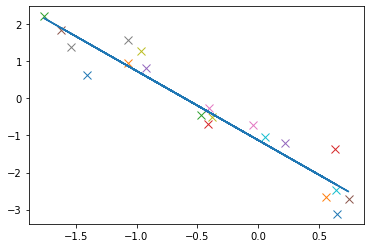

In [30]:
#creare grafic

print(x)

for i in range(np.shape(A)[0]):
    plt.plot(A[i, 0], A[i, 1], marker="x", markersize=8, markerfacecolor="green")


plt.plot(A[:, 0], x[0] * A[:, 0] + x[1])
